In [82]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [83]:
def pdistance(seq1, seq2):
    """
    calculates pairwise distance between two sequences
    """
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    for (x,y) in pairs:
        if x != y:
            p += 1
    length = len(pairs)
    return float(1 - p / length) # '1 minus the distance' is just for taking 'upside down' the plot for nice view

In [84]:
def draw_simplot(distance_data):
    """
    draws simplot
    takes distance_data from simgen
    """
    fig = plt.figure(figsize=(20, 8)) 
    ax = plt.axes() # to hide the x labels, as they are 'windows' 
    
    for key in distance_data.keys():
        plt.plot(distance_data[key], label=key)
    
    plt.setp(ax.get_xticklabels(), visible=False) # to hide the x labels
    
    plt.yticks(fontsize=20)
    plt.ylim(-0.1, 1.3)
    plt.title("simplot", fontsize=24)
    plt.xlabel("position in the alignment", fontsize=22)
    plt.ylabel("distance from the potential recombinant", fontsize=22)
    
    plt.legend(fontsize=15)
    

In [85]:
def simgen(align, pot_rec, window=500, shift=100, region=False):
    """
    'align' is a path to the alignment
    pot_rec is the index of the potential recombinant (starts with zero)
    window is a sliding window size
    shift is a step in nucleotied by which the window is shifted downstream the sequence
    region, if given, should be a tuple or a list with slice indices
    """
        
    if region:
        align = AlignIO.read(align, "fasta")
        align = align[:, region[0] : region[1]]
    else:
        align = AlignIO.read(align, "fasta")
   
    distance_data = {}
    parents = list(range(0, len(align)))
    parents.remove(pot_rec)
     
    align_length = len(align[0, :])
    
    for par in parents:
        dist_container = []
        start = 0
        finish = shift
        while start < align_length:
            seq1 = align[pot_rec, start:finish].seq # here is potential recombinant sequence slice
            seq2 = align[par, start:finish].seq  # here's parent
            dist = pdistance(seq1, seq2)
            dist_container.append(dist)
            start = start + shift
            finish = start + window
    
        distance_data[align[pot_rec].id + "_vs_" + align[par].id] = dist_container
    
    draw_simplot(distance_data)

- whole alignment analysis :

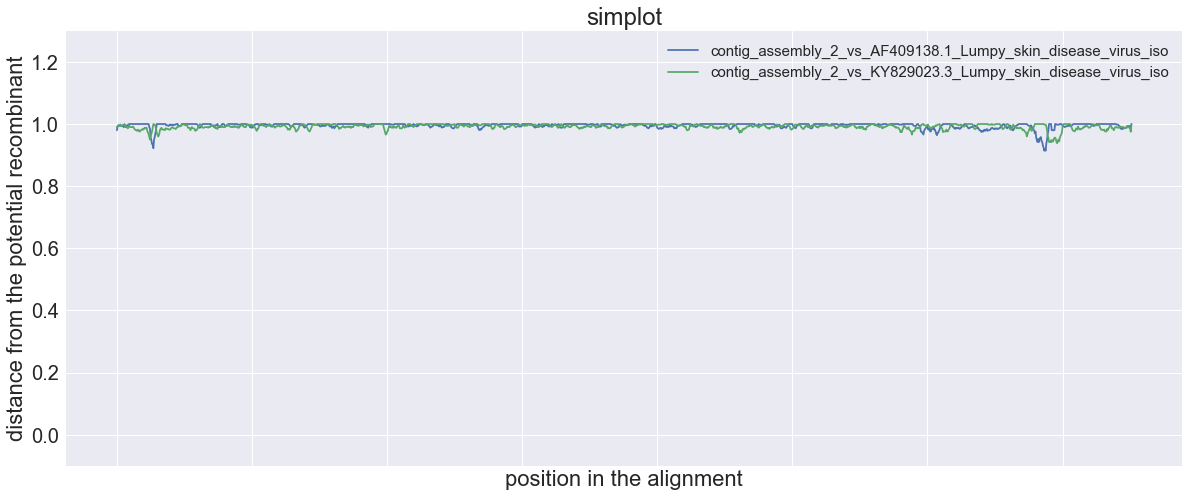

In [86]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2)

- whole alignment with shift and window arguments  :

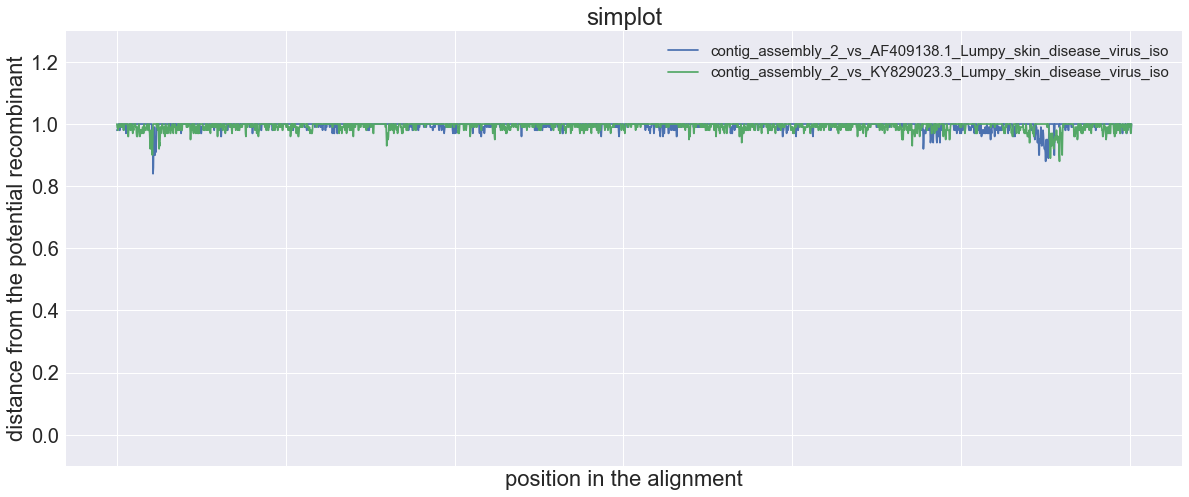

In [88]:
simgen("for_recan_lsdv_1.fasta", window=100, shift=50, pot_rec=2)

- here we take the slice :

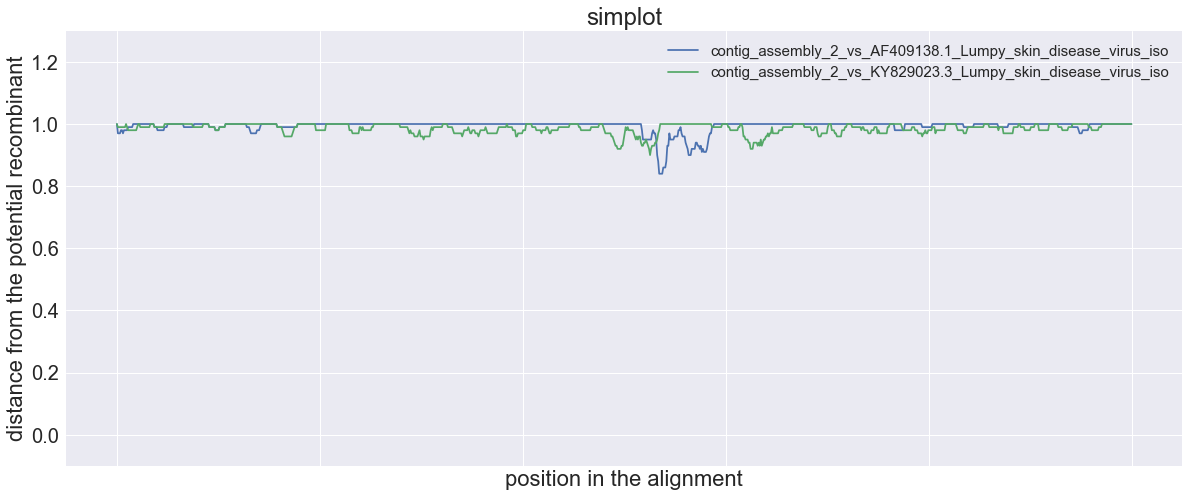

In [89]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2, window=100, shift=10, region=(0, 10000))

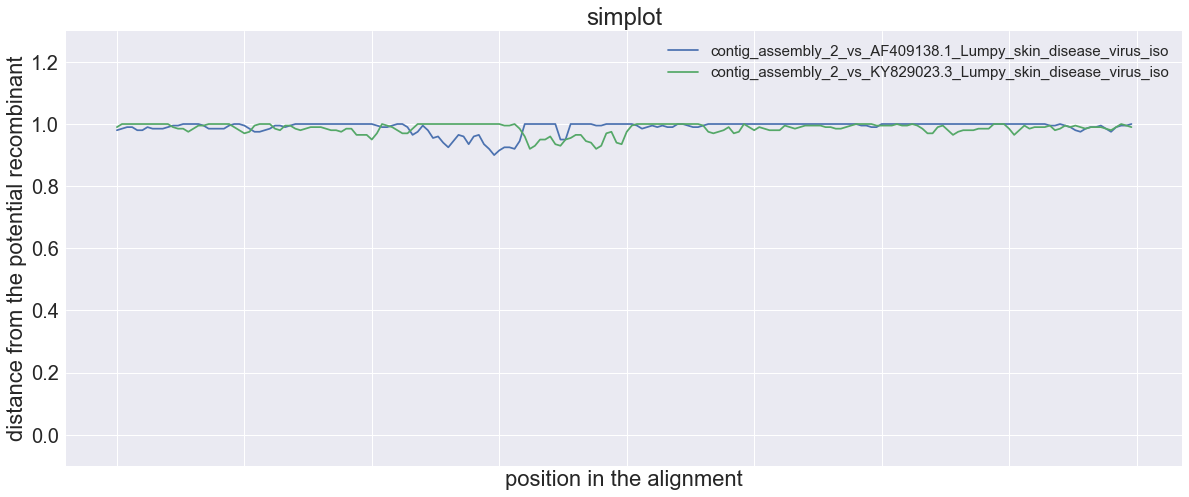

In [90]:
simgen("for_recan_lsdv_1.fasta", pot_rec=2, window=200, shift=100, region=(130000, 150000))

- alignment with HBV sequences :

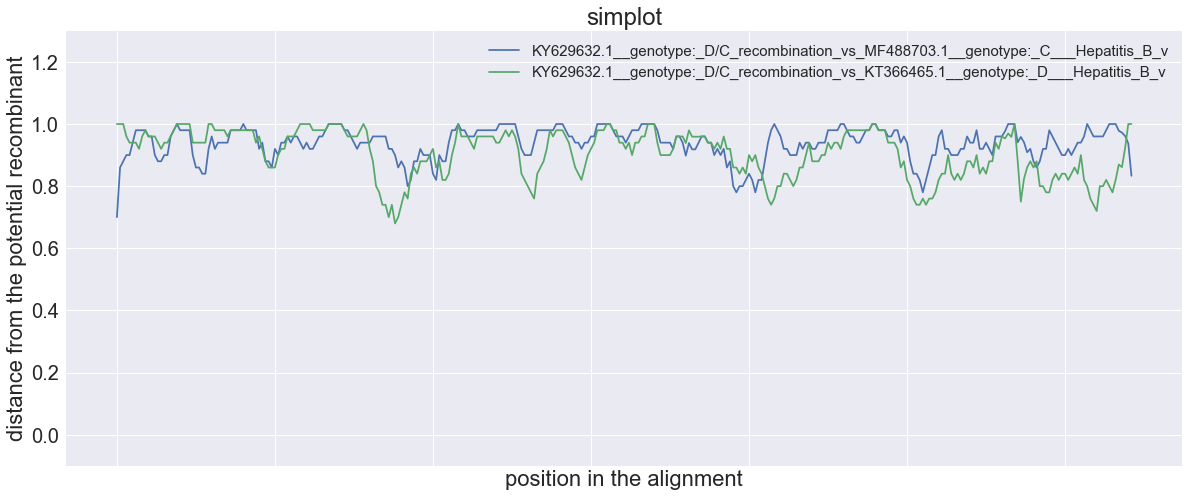

In [92]:
simgen("hbv.fasta", window=50, shift=10, pot_rec=2)